In [5]:
from utils import load_data
import matplotlib.pyplot as plt
import numpy as np
import keras
def get_data(num_training=25709, num_validation=3000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_pub_test))
    X_pub_test = X_pub_test[mask]
    y_pub_test = y_pub_test[mask]
    mask = list(range(num_pri_test))
    X_pri_test = X_pri_test[mask]
    y_pri_test = y_pri_test[mask]

#     # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_pub_test -= mean_image
    X_pri_test -= mean_image  
    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test
    #return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
#X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')
print(X_train.shape[1:])
X_train /= 255
X_val /= 255
X_pub_test /= 255
X_pri_test /= 255

Clear previously loaded data.
Train data shape:  (25709, 48, 48, 1)
Train labels shape:  (25709,)
Validation data shape:  (3000, 48, 48, 1)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 48, 48, 1)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 48, 48, 1)
Private test labels shape:  (1000,)
(48, 48, 1)


Public Test loss: 1.15490704536438
Public Test accuracy: 0.59
Private Test loss: 1.107357162475586
Private Test accuracy: 0.605


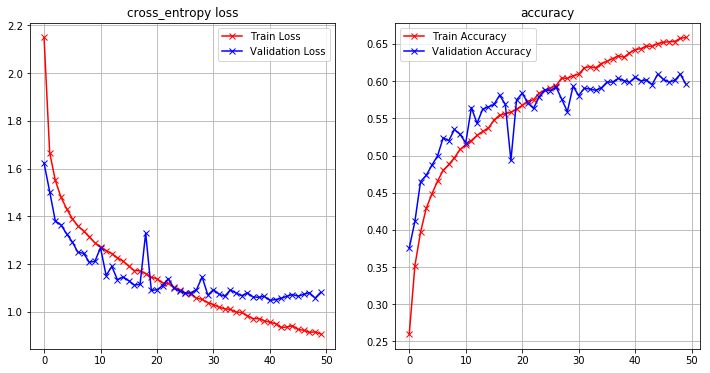

In [9]:
import pickle
loaded_model = pickle.load(open('Trained_VGG.sav', 'rb'))

score = loaded_model.evaluate(X_pub_test, y_pub_test, verbose=0)
print('Public Test loss:', score[0])
print('Public Test accuracy:', score[1])
score = loaded_model.evaluate(X_pri_test, y_pri_test, verbose=0)
print('Private Test loss:', score[0])
print('Private Test accuracy:', score[1])

f = open('history.pckl', 'rb')
history = pickle.load(f)
f.close()

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history["loss"],'r-x', label="Train Loss")
    ax.plot(history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

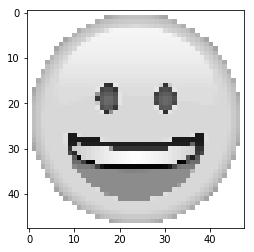

Predicted class is: [3]


/home/minhthong04111989/anaconda3/envs/myproj/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/home/minhthong04111989/anaconda3/envs/myproj/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


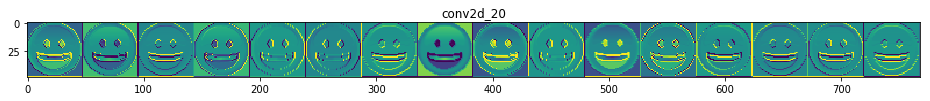

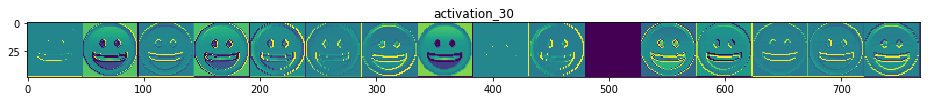

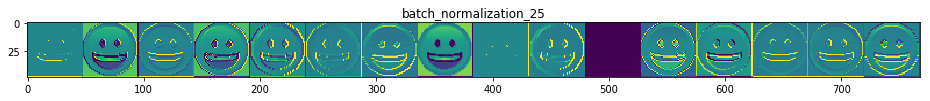

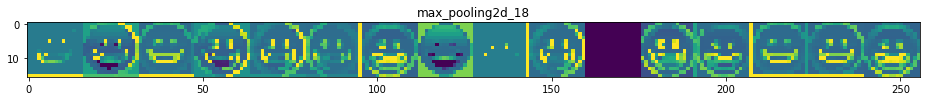

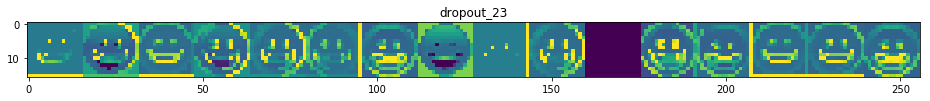

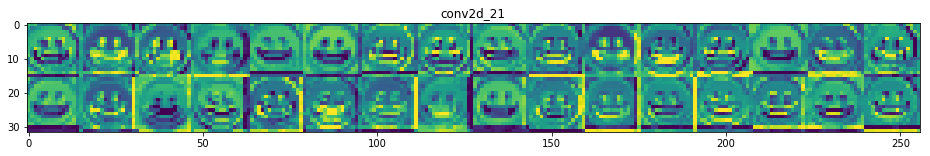

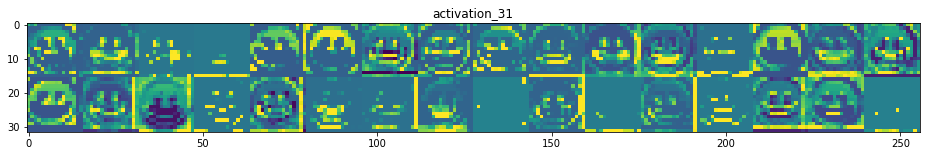

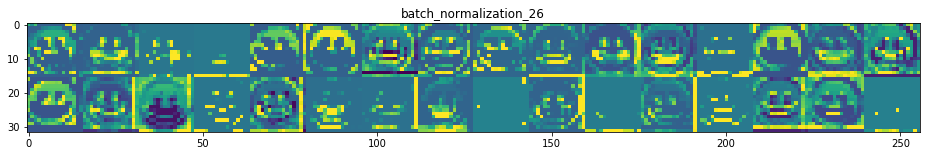

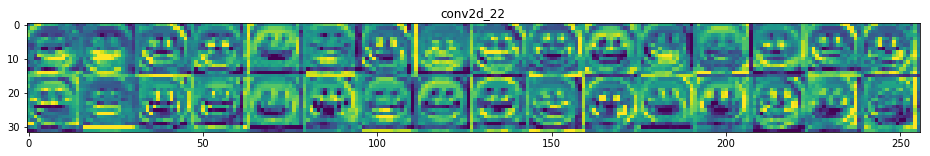

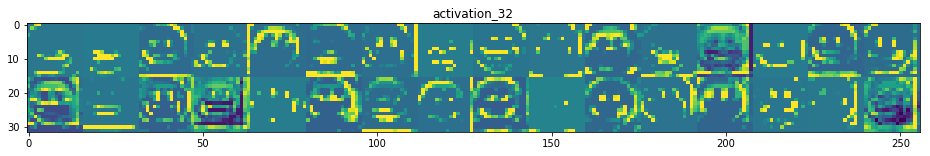

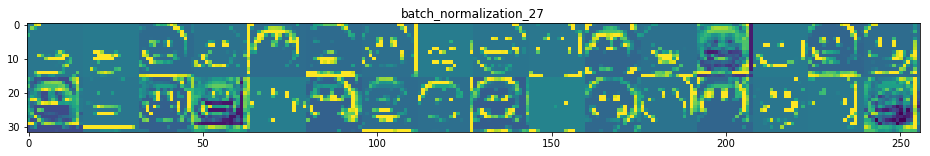

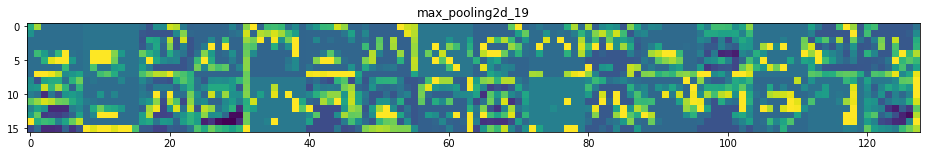

In [24]:
from keras import models
from keras.preprocessing import image
layer_outputs = [layer.output for layer in loaded_model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

#LOAD IMAGE
img_path = 'SmilingFace.png'
img = image.load_img(img_path, color_mode = "grayscale", target_size=(48, 48))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation
classes = loaded_model.predict_classes(img_tensor, batch_size=1)
plt.imshow(img_tensor.reshape(48, 48), cmap='Greys_r');
plt.show()
print("Predicted class is:",classes)

# img_tensor = np.expand_dims(X_train[1150], axis=0)
# activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation
# classes = loaded_model.predict_classes(img_tensor, batch_size=1)
# plt.imshow(X_train[1150].reshape(48, 48), cmap='Greys_r');
# plt.show()
# print("Predicted class is:",classes)


#ALL LAYERS
layer_names = []
for layer in loaded_model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')